## Load Libraries

In [1]:
import tqdm
import os
import cv2
import imghdr
import image_to_numpy
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
import itertools
from numpy.random import default_rng

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomContrast, RandomBrightness, Rescaling, Resizing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, ReLU
from tensorflow.keras.metrics import F1Score, Precision, Recall, CategoricalAccuracy, BinaryAccuracy
from tensorboard.plugins.hparams import api as hp
import sklearn
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold

from time import perf_counter
import math

import neptune
from neptune.integrations.tensorflow_keras import NeptuneCallback

# Adr-INI-KFold

## Get Dataset

In [2]:
labels = ['Not Issue', 'Issue']
X_train = []
y_train = []
y_label_idx = []
image_size = 256
for i in labels:
    folderPath = os.path.join('D:\\DATASETS\\INI-Real_World_Data_Test', i)
    for j in os.listdir(folderPath):
        img = image_to_numpy.load_image_file(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_label_idx.append(labels.index(i))

In [3]:
X_train = np.array(X_train)
y_label_idx = np.array(y_label_idx)

X_train_scaled = X_train.astype(np.float32) / 255.0

## Evaluate Final-B4_0_1-converted  

In [4]:
model_path = "C:\\Users\\user\\Documents\\Machine-Learning-Hub-1\\Exp-Flask-New-Thesis\\model\\INI\\Final-Adr-INI-5_1_1-converted.keras"
sm = tf.keras.models.load_model(model_path)

In [6]:
pre = Precision()
rec = Recall()
c_acc = BinaryAccuracy()
f1_score = F1Score()

test_labels = []
test_preds = []

y = tf.keras.utils.to_categorical(y_label_idx)
for i in range(len(X_train_scaled)):
    ready_image = np.expand_dims(X_train_scaled[i], 0)
    yhat = sm.predict(ready_image, verbose=0)
    
    ytrue = np.expand_dims(y[i], 0)
    f1_score.update_state(ytrue, yhat)
    pre.update_state(ytrue, yhat)
    rec.update_state(ytrue, yhat)
    c_acc.update_state(ytrue, yhat)
    
    test_labels.append(y[i])
    test_preds.append(yhat[0])


# PRINTING RESULTS ===========================================
print("KFold  INI Binary Model Result")
print(f'Precision: {pre.result().numpy()}  -  Recall: {rec.result().numpy()}')
print(f'Accuracy: {c_acc.result().numpy()}')
print(f'F1Score: Not Issue {f1_score.result().numpy()[0]} | Issue {f1_score.result().numpy()[1]}')
    

KFold CV INI Binary Model Result
Precision: 0.75  -  Recall: 0.75
Accuracy: 0.75
F1Score: Not Issue 0.7272727489471436 | Issue 0.7692307829856873


## Plot Confusion Matrix

In [7]:
test_labels = np.array(test_labels)
test_preds = np.array(test_preds)

In [8]:
test_labels_c = [np.argmax(x) for x in test_labels]
test_labels_c = np.array(test_labels_c)

test_preds_c = [np.argmax(x) for x in test_preds]
test_preds_c = np.array(test_preds_c)


In [9]:
cm = sklearn.metrics.confusion_matrix(test_labels_c, test_preds_c)

Text(0.5, 1.0, 'Confusion Matrix')

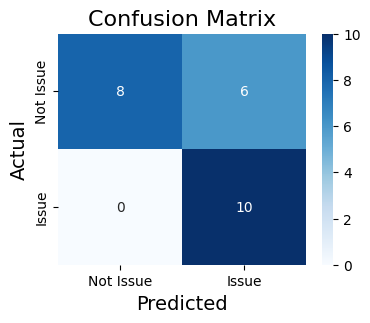

In [11]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap="Blues", cbar=True,
            xticklabels=['Not Issue', 'Issue'],
            yticklabels=['Not Issue', 'Issue'],
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

In [12]:
acc_road = (10 + 0) / (10 + 0 + 6 + 0)     # (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
precision_road = 10 / (10 + 6)   # True positives/ (True positives + False positives)
recall_road = 10 / (10 + 0)  # True Positive (TP) / True Positive (TP) + False Negative (FN) 
f1_road = 2 * (precision_road * recall_road) / (precision_road + recall_road)

print(f'Accuracy (Issue): {acc_road}')
print(f'Precision (Issue): {precision_road}')
print(f'Recall (Issue): {recall_road}')
print(f'F1-Score (Issue): {f1_road}')

Accuracy (Issue): 0.625
Precision (Issue): 0.625
Recall (Issue): 1.0
F1-Score (Issue): 0.7692307692307693


# Final-B4_0_1-converted  

## Get Dataset

In [2]:
labels = ['Not Road', 'Road']
X_train = []
y_train = []
y_label_idx = []
image_size = 256
for i in labels:
    folderPath = os.path.join('D:\\DATASETS\\FireBase-Data\\Unseen-Testing-Data-For-Binary', i)
    for j in os.listdir(folderPath):
        img = image_to_numpy.load_image_file(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_label_idx.append(labels.index(i))

In [3]:
X_train = np.array(X_train)
y_label_idx = np.array(y_label_idx)

X_train_scaled = X_train.astype(np.float32) / 255.0

## Evaluate Final-B4_0_1-converted  

In [4]:
model_path = "C:\\Users\\user\\Documents\\Machine-Learning-Hub-1\\Tensorflow\\kaggle_converted\\Final-B4_0_1-converted.keras"
sm = tf.keras.models.load_model(model_path)

In [5]:
pre = Precision()
rec = Recall()
c_acc = BinaryAccuracy()
f1_score = F1Score()

test_labels = []
test_preds = []

y = tf.keras.utils.to_categorical(y_label_idx)
for i in range(len(X_train_scaled)):
    ready_image = np.expand_dims(X_train_scaled[i], 0)
    yhat = sm.predict(ready_image, verbose=0)
    
    ytrue = np.expand_dims(y[i], 0)
    f1_score.update_state(ytrue, yhat)
    pre.update_state(ytrue, yhat)
    rec.update_state(ytrue, yhat)
    c_acc.update_state(ytrue, yhat)
    
    test_labels.append(y[i])
    test_preds.append(yhat[0])


# PRINTING RESULTS ===========================================
print("KFold CV Binary Model Result")
print(f'Precision: {pre.result().numpy()}  -  Recall: {rec.result().numpy()}')
print(f'Accuracy: {c_acc.result().numpy()}')
print(f'F1Score: Not Road {f1_score.result().numpy()[0]} | Road {f1_score.result().numpy()[1]}')
    

KFold CV Binary Model Result
Precision: 0.753731369972229  -  Recall: 0.753731369972229
Accuracy: 0.753731369972229
F1Score: Not Road 0.6206896901130676 | Road 0.8176795244216919


## Plot Confusion Matrix

In [6]:
test_labels = np.array(test_labels)
test_preds = np.array(test_preds)

In [7]:
test_labels_c = [np.argmax(x) for x in test_labels]
test_labels_c = np.array(test_labels_c)

test_preds_c = [np.argmax(x) for x in test_preds]
test_preds_c = np.array(test_preds_c)


In [10]:
cm = sklearn.metrics.confusion_matrix(test_labels_c, test_preds_c)

Text(0.5, 1.0, 'Confusion Matrix')

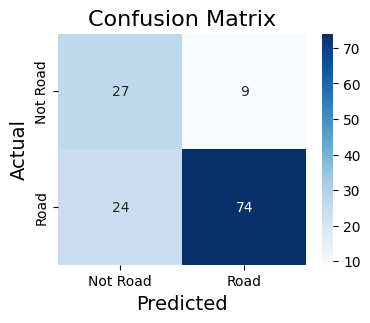

In [11]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap="Blues", cbar=True,
            xticklabels=['Not Road', 'Road'],
            yticklabels=['Not Road', 'Road'],
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

In [22]:
acc_road = (74 + 0) / (74 + 0 + 9 + 24)     # (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
precision_road = 74 / (74 + 9)   # True positives/ (True positives + False positives)
recall_road = 74 / (74 + 24)  # True Positive (TP) / True Positive (TP) + False Negative (FN) 
f1_road = 2 * (precision_road * recall_road) / (precision_road + recall_road)

print(f'Accuracy (Road): {acc_road}')
print(f'Precision (Road): {precision_road}')
print(f'Recall (Road): {recall_road}')
print(f'F1-Score (Road): {f1_road}')

Accuracy (Road): 0.6915887850467289
Precision (Road): 0.891566265060241
Recall (Road): 0.7551020408163265
F1-Score (Road): 0.8176795580110497


# Model V4.0.1 (Deployed Model)

## Get Dataset

In [13]:
labels = ['Building','Plant', 'Road', 'Not Road']
X_train = []
y_train = []
y_label_idx = []
image_size = 256
for i in labels:
    
    folderPath = os.path.join("D:\\DATASETS\\FireBase-Data\\Unseen-Testing-Data-For-4_Class", i)
    if not os.path.exists(folderPath):
        continue
    for j in os.listdir(folderPath):
        img = image_to_numpy.load_image_file(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_label_idx.append(labels.index(i))

In [14]:
X_train = np.array(X_train)
y_label_idx = np.array(y_label_idx)

X_train_scaled = X_train.astype(np.float32) / 255.0

## Evaluate Model V4.0.1 (Deployed Model)

In [15]:
model_path = "C:\\Users\\user\\Documents\\Machine-Learning-Hub-1\\Exp-Flask-New-Thesis\\model\\RNR\\Old\\Model_V4-0-1.keras"
sm = tf.keras.models.load_model(model_path)

In [16]:
pre = Precision()
rec = Recall()
c_acc = BinaryAccuracy()
f1_score = F1Score()

test_labels = []
test_preds = []

y = tf.keras.utils.to_categorical(y_label_idx, 4)
for i in range(len(X_train_scaled)):
    ready_image = np.expand_dims(X_train_scaled[i], 0)
    yhat = sm.predict(ready_image, verbose=0)
    ytrue = np.expand_dims(y[i], 0)
    f1_score.update_state(ytrue, yhat)
    pre.update_state(ytrue, yhat)
    rec.update_state(ytrue, yhat)
    c_acc.update_state(ytrue, yhat)

    test_labels.append(y[i])
    test_preds.append(yhat[0])

# PRINTING RESULTS ===========================================
print("Holdout 4-Class Model Result")
print(f'Precision: {pre.result().numpy()}  -  Recall: {rec.result().numpy()}')
print(f'Accuracy: {c_acc.result().numpy()}')
# print(f'F1Score: Building {f1_score.result().numpy()[0]} | Plant {f1_score.result().numpy()[1]}')
# print(f'F1Score: Road {f1_score.result().numpy()[2]} | Vehicle {f1_score.result().numpy()[3]}')
print(f'F1Score: Road {f1_score.result().numpy()[2]}')

Holdout 4-Class Model Result
Precision: 0.6880000233650208  -  Recall: 0.641791045665741
Accuracy: 0.8376865386962891
F1Score: Road 0.813559353351593


## Plot Confusion Matrix

In [17]:
test_labels = np.array(test_labels)
test_preds = np.array(test_preds)

In [18]:
test_labels_c = [np.argmax(x) for x in test_labels]
test_labels_c = np.array(test_labels_c)

test_preds_c = [np.argmax(x) for x in test_preds]
test_preds_c = np.array(test_preds_c)


In [19]:
cm = sklearn.metrics.confusion_matrix(test_labels_c, test_preds_c)

Text(0.5, 1.0, 'Confusion Matrix')

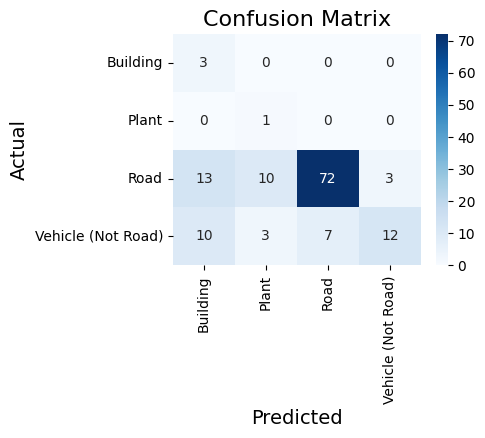

In [20]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap="Blues", cbar=True,
            xticklabels=['Building','Plant', 'Road', 'Vehicle (Not Road)'],
            yticklabels=['Building','Plant', 'Road', 'Vehicle (Not Road)'],
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

In [21]:
acc_road = 72 / 98
precision_road = 72 / (72 + 7)   # True positives/ (True positives + False positives)
recall_road = 72 / (72 + 26)  # True Positive (TP) / True Positive (TP) + False Negative (FN) 
f1_road = 2 * (precision_road * recall_road) / (precision_road + recall_road)

print(f'Accuracy (Road): {acc_road}')
print(f'Precision (Road): {precision_road}')
print(f'Recall (Road): {recall_road}')
print(f'F1-Score (Road): {f1_road}')

Accuracy (Road): 0.7346938775510204
Precision (Road): 0.9113924050632911
Recall (Road): 0.7346938775510204
F1-Score (Road): 0.8135593220338984


# AdrKFold-Final-4_0_1-converted

## Get Dataset

In [ ]:
labels = ['Building','Plant', 'Road', 'Not Road']
X_train = []
y_train = []
y_label_idx = []
image_size = 256
for i in labels:
    
    folderPath = os.path.join('D:\\DATASETS\\FireBase-Data\\Unseen-Testing-Data-For-4_Class', i)
    if not os.path.exists(folderPath):
        continue
    for j in os.listdir(folderPath):
        img = image_to_numpy.load_image_file(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_label_idx.append(labels.index(i))

In [ ]:
X_train = np.array(X_train)
y_label_idx = np.array(y_label_idx)

X_train_scaled = X_train.astype(np.float32) / 255.0

## Evaluate AdrKFold-Final-4_0_1-converted

In [ ]:
model_path = "C:\\Users\\user\\Documents\\Machine-Learning-Hub-1\\Tensorflow\\kaggle_converted\\AdrKFold-Final-4_0_1-converted.keras"
sm = tf.keras.models.load_model(model_path)

In [ ]:
pre = Precision()
rec = Recall()
c_acc = BinaryAccuracy()
f1_score = F1Score()


y = tf.keras.utils.to_categorical(y_label_idx, 4)
for i in range(len(X_train_scaled)):
    ready_image = np.expand_dims(X_train_scaled[i], 0)
    yhat = sm.predict(ready_image, verbose=0)
    ytrue = np.expand_dims(y[i], 0)
    f1_score.update_state(ytrue, yhat)
    pre.update_state(ytrue, yhat)
    rec.update_state(ytrue, yhat)
    c_acc.update_state(ytrue, yhat)

# PRINTING RESULTS ===========================================
print("4-Class Deployed Model Result")
print(f'Precision: {pre.result().numpy()}  -  Recall: {rec.result().numpy()}')
print(f'Accuracy: {c_acc.result().numpy()}')
print(f'F1Score: Building {f1_score.result().numpy()[0]} | Plant {f1_score.result().numpy()[1]}')
print(f'F1Score: Road {f1_score.result().numpy()[2]} | Vehicle {f1_score.result().numpy()[3]}')
    

# PCNN0206_01B

## Get Dataset

In [2]:
labels = ['Building','Plant', 'Road', 'Not Road']
X_train = []
y_train = []
y_label_idx = []
image_size = 256
for i in labels:
    
    folderPath = os.path.join('D:\\DATASETS\\FireBase-Data\\Unseen-Testing-Data-For-4_Class', i)
    if not os.path.exists(folderPath):
        continue
    for j in os.listdir(folderPath):
        img = image_to_numpy.load_image_file(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_label_idx.append(labels.index(i))

In [3]:
X_train = np.array(X_train)
y_label_idx = np.array(y_label_idx)

X_train_scaled = X_train.astype(np.float32) / 255.0

## Evaluate PCNN0206_01B

In [4]:
model_path = "C:\\Users\\user\\Documents\\Machine-Learning-Hub-1\\Exp-Flask-New-Thesis\\model\\RNR\\PCNN0206_01B.keras"
sm = tf.keras.models.load_model(model_path)

In [5]:
pre = Precision()
rec = Recall()
c_acc = BinaryAccuracy()
f1_score = F1Score()

test_labels = []
test_preds = []

y = tf.keras.utils.to_categorical(y_label_idx, 4)
for i in range(len(X_train_scaled)):
    ready_image = np.expand_dims(X_train_scaled[i], 0)
    yhat = sm.predict(ready_image, verbose=0)
    ytrue = np.expand_dims(y[i], 0)
    f1_score.update_state(ytrue, yhat)
    pre.update_state(ytrue, yhat)
    rec.update_state(ytrue, yhat)
    c_acc.update_state(ytrue, yhat)

    test_labels.append(y[i])
    test_preds.append(yhat[0])

# PRINTING RESULTS ===========================================
print("KFold CV 4-Class Model Result")
print(f'Precision: {pre.result().numpy()}  -  Recall: {rec.result().numpy()}')
print(f'Accuracy: {c_acc.result().numpy()}')
# print(f'F1Score: Building {f1_score.result().numpy()[0]} | Plant {f1_score.result().numpy()[1]}')
# print(f'F1Score: Road {f1_score.result().numpy()[2]} | Vehicle {f1_score.result().numpy()[3]}')
print(f'F1Score: Road {f1_score.result().numpy()[2]}')

KFold CV 4-Class Model Result
Precision: 0.5440000295639038  -  Recall: 0.5074626803398132
Accuracy: 0.77052241563797
F1Score: Road 0.6967741847038269


## Plot Confusion Matrix

In [6]:
test_labels = np.array(test_labels)
test_preds = np.array(test_preds)

In [7]:
test_labels_c = [np.argmax(x) for x in test_labels]
test_labels_c = np.array(test_labels_c)

test_preds_c = [np.argmax(x) for x in test_preds]
test_preds_c = np.array(test_preds_c)


In [8]:
cm = sklearn.metrics.confusion_matrix(test_labels_c, test_preds_c)

Text(0.5, 1.0, 'Confusion Matrix')

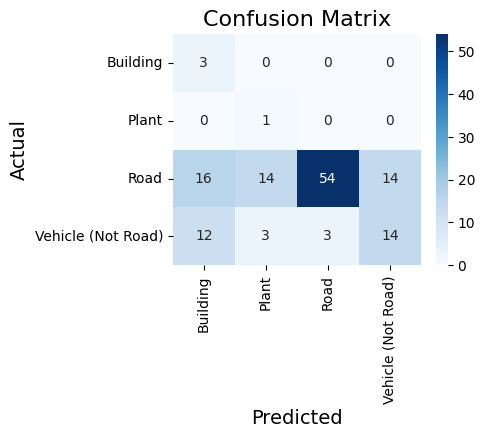

In [9]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap="Blues", cbar=True,
            xticklabels=['Building','Plant', 'Road', 'Vehicle (Not Road)'],
            yticklabels=['Building','Plant', 'Road', 'Vehicle (Not Road)'],
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

In [10]:
precision_road = 54 / (54 + 3)   # True positives/ (True positives + False positives)
recall_road = 54 / (54 + 44)  # True Positive (TP) / (True Positive + False Negative) 
f1_road = 2 * (precision_road * recall_road) / (precision_road + recall_road)

print(f'Precision (Road): {precision_road}')
print(f'Recall (Road): {recall_road}')
print(f'F1-Score (Road): {f1_road}')

Precision (Road): 0.9473684210526315
Recall (Road): 0.5510204081632653
F1-Score (Road): 0.6967741935483871


# Final-3CLS-NB-4_0_1-converted

## Get Dataset

In [31]:
labels = ['Plant','Vehicle (Not Road)', 'Road']
X_train = []
y_train = []
y_label_idx = []
image_size = 256
for i in labels:
    
    folderPath = os.path.join('D:\\DATASETS\\FireBase-Data\\Unseen-Testing-Data-For-3_Class', i)
    if not os.path.exists(folderPath):
        continue
    for j in os.listdir(folderPath):
        img = image_to_numpy.load_image_file(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_label_idx.append(labels.index(i))

In [32]:
X_train = np.array(X_train)
y_label_idx = np.array(y_label_idx)

X_train_scaled = X_train.astype(np.float32) / 255.0

## Evaluate Final-3CLS-NB-4_0_1-converted

In [33]:
model_path = "C:\\Users\\user\\Documents\\Machine-Learning-Hub-1\\Tensorflow\\colab_converted\\Final-3CLS-NB-4_0_1-converted.keras"
sm = tf.keras.models.load_model(model_path)

In [34]:
pre = Precision()
rec = Recall()
c_acc = BinaryAccuracy()
f1_score = F1Score()

test_labels = []
test_preds = []

y = tf.keras.utils.to_categorical(y_label_idx, 3)
for i in range(len(X_train_scaled)):
    ready_image = np.expand_dims(X_train_scaled[i], 0)
    yhat = sm.predict(ready_image, verbose=0)
    ytrue = np.expand_dims(y[i], 0)
    f1_score.update_state(ytrue, yhat)
    pre.update_state(ytrue, yhat)
    rec.update_state(ytrue, yhat)
    c_acc.update_state(ytrue, yhat)

    test_labels.append(y[i])
    test_preds.append(yhat[0])

# PRINTING RESULTS ===========================================
print("KFold CV 3-Class Model (NB) Result")
print(f'Precision: {pre.result().numpy()}  -  Recall: {rec.result().numpy()}')
print(f'Accuracy: {c_acc.result().numpy()}')
# print(f'F1Score: Plant {f1_score.result().numpy()[0]} | Vehicle (NR) {f1_score.result().numpy()[1]}')
# print(f'F1Score: Road {f1_score.result().numpy()[2]} | Vehicle {f1_score.result().numpy()[3]}')
print(f'F1Score: Road {f1_score.result().numpy()[2]}')

KFold CV 3-Class Model (NB) Result
Precision: 0.7384615540504456  -  Recall: 0.7164179086685181
Accuracy: 0.8208954930305481
F1Score: Road 0.8156424760818481


## Plot Confusion Matrix

In [35]:
test_labels = np.array(test_labels)
test_preds = np.array(test_preds)

In [36]:
test_labels_c = [np.argmax(x) for x in test_labels]
test_labels_c = np.array(test_labels_c)

test_preds_c = [np.argmax(x) for x in test_preds]
test_preds_c = np.array(test_preds_c)


In [37]:
cm = sklearn.metrics.confusion_matrix(test_labels_c, test_preds_c)

Text(0.5, 1.0, 'Confusion Matrix')

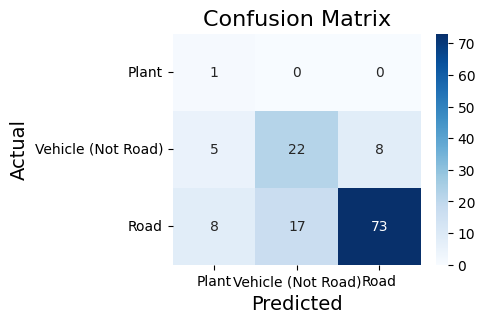

In [38]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap="Blues", cbar=True,
            xticklabels=['Plant','Vehicle (Not Road)', 'Road'],
            yticklabels=['Plant','Vehicle (Not Road)', 'Road'],
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

In [ ]:
precision_road = 73 / (73 + 8)   # True positives/ (True positives + False positives)
recall_road = 73 / (73 + 25)  # True Positive (TP) / (True Positive + False Negative) 
f1_road = 2 * (precision_road * recall_road) / (precision_road + recall_road)

print(f'Precision (Road): {precision_road}')
print(f'Recall (Road): {recall_road}')
print(f'F1-Score (Road): {f1_road}')

# Final-3CLS-NP-4_0_1-converted

## Get Dataset

In [39]:
labels = ['Building','Vehicle (Not Road)', 'Road']
X_train = []
y_train = []
y_label_idx = []
image_size = 256
for i in labels:
    
    folderPath = os.path.join('D:\\DATASETS\\FireBase-Data\\Unseen-Testing-Data-For-3_Class_NP', i)
    if not os.path.exists(folderPath):
        continue
    for j in os.listdir(folderPath):
        img = image_to_numpy.load_image_file(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_label_idx.append(labels.index(i))

In [40]:
X_train = np.array(X_train)
y_label_idx = np.array(y_label_idx)

X_train_scaled = X_train.astype(np.float32) / 255.0

## Evaluate Final-3CLS-NP-4_0_1-converted

In [41]:
model_path = "C:\\Users\\user\\Documents\\Machine-Learning-Hub-1\\Tensorflow\\kaggle_converted\\Final-3CLS-NP-4_0_1-converted.keras"
sm = tf.keras.models.load_model(model_path)

In [42]:
pre = Precision()
rec = Recall()
c_acc = BinaryAccuracy()
f1_score = F1Score()

test_labels = []
test_preds = []

y = tf.keras.utils.to_categorical(y_label_idx, 3)
for i in range(len(X_train_scaled)):
    ready_image = np.expand_dims(X_train_scaled[i], 0)
    yhat = sm.predict(ready_image, verbose=0)
    ytrue = np.expand_dims(y[i], 0)
    f1_score.update_state(ytrue, yhat)
    pre.update_state(ytrue, yhat)
    rec.update_state(ytrue, yhat)
    c_acc.update_state(ytrue, yhat)

    test_labels.append(y[i])
    test_preds.append(yhat[0])

# PRINTING RESULTS ===========================================
print("KFold CV 3-Class Model Result")
print(f'Precision: {pre.result().numpy()}  -  Recall: {rec.result().numpy()}')
print(f'Accuracy: {c_acc.result().numpy()}')
# print(f'F1Score: Plant {f1_score.result().numpy()[0]} | Vehicle (NR) {f1_score.result().numpy()[1]}')
# print(f'F1Score: Road {f1_score.result().numpy()[2]} | Vehicle {f1_score.result().numpy()[3]}')

print(f'F1Score: Road {f1_score.result().numpy()[2]}')

KFold CV 3-Class Model Result
Precision: 0.5519999861717224  -  Recall: 0.5149253606796265
Accuracy: 0.6990049481391907
F1Score: Road 0.7228915095329285


## Plot Confusion Matrix

In [43]:
test_labels = np.array(test_labels)
test_preds = np.array(test_preds)

In [44]:
test_labels_c = [np.argmax(x) for x in test_labels]
test_labels_c = np.array(test_labels_c)

test_preds_c = [np.argmax(x) for x in test_preds]
test_preds_c = np.array(test_preds_c)


In [45]:
cm = sklearn.metrics.confusion_matrix(test_labels_c, test_preds_c)

Text(0.5, 1.0, 'Confusion Matrix')

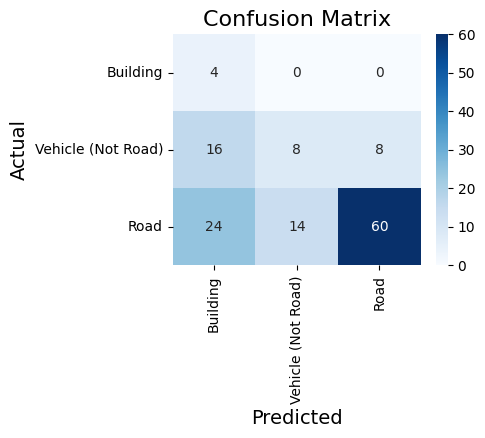

In [46]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap="Blues", cbar=True,
            xticklabels=['Building','Vehicle (Not Road)', 'Road'],
            yticklabels=['Building','Vehicle (Not Road)', 'Road'],
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

In [ ]:
precision_road = 60 / (60 + 8)   # True positives/ (True positives + False positives)
recall_road = 60 / (60 + 38)  # True Positive (TP) / (True Positive + False Negative) 
f1_road = 2 * (precision_road * recall_road) / (precision_road + recall_road)

print(f'Precision (Road): {precision_road}')
print(f'Recall (Road): {recall_road}')
print(f'F1-Score (Road): {f1_road}')

# Final-2CLS-OV-4_0_1-converted

## Get Dataset

In [ ]:
labels = ['Vehicle (Not Road)', 'Road']
X_train = []
y_train = []
y_label_idx = []
image_size = 256
for i in labels:
    
    folderPath = os.path.join('D:\\DATASETS\\FireBase-Data\\Unseen-Testing-Data-For-2_Class_OV', i)
    if not os.path.exists(folderPath):
        continue
    for j in os.listdir(folderPath):
        img = image_to_numpy.load_image_file(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_label_idx.append(labels.index(i))

In [ ]:
X_train = np.array(X_train)
y_label_idx = np.array(y_label_idx)

X_train_scaled = X_train.astype(np.float32) / 255.0

## Evaluate Final-2CLS-OV-4_0_1-converted

In [ ]:
model_path = "C:\\Users\\user\\Documents\\Machine-Learning-Hub-1\\Tensorflow\\colab_converted\\Final-2CLS-OV-4_0_1-converted.keras"
sm = tf.keras.models.load_model(model_path)

In [ ]:
pre = Precision()
rec = Recall()
c_acc = BinaryAccuracy()
f1_score = F1Score()


y = tf.keras.utils.to_categorical(y_label_idx, 2)
for i in range(len(X_train_scaled)):
    ready_image = np.expand_dims(X_train_scaled[i], 0)
    yhat = sm.predict(ready_image, verbose=0)
    ytrue = np.expand_dims(y[i], 0)
    f1_score.update_state(ytrue, yhat)
    pre.update_state(ytrue, yhat)
    rec.update_state(ytrue, yhat)
    c_acc.update_state(ytrue, yhat)

# PRINTING RESULTS ===========================================
print("KFold CV 2-Class (OV) Model Result")
print(f'Precision: {pre.result().numpy()}  -  Recall: {rec.result().numpy()}')
print(f'Accuracy: {c_acc.result().numpy()}')
print(f'F1Score: Road {f1_score.result().numpy()[1]}')

# Print Result of Specific Images

In [ ]:
model_path = "C:\\Users\\user\\Documents\\Machine-Learning-Hub-1\\Tensorflow\\kaggle_converted\\Final-B4_0_1-converted.keras"
sm = tf.keras.models.load_model(model_path)

In [ ]:
def predict_plot(img_path, class_count=4, model_type="R"):
    # img = Image.open(img_path)
    img = image_to_numpy.load_image_file(img_path)
    resize = tf.image.resize(img, (256,256))
    ready_image = np.expand_dims(resize/255, 0)
    yhat = sm.predict(ready_image)
    
    if class_count == 4:
        print(f"Raw: {yhat}")
        print("Labels:   0-Building   1-Plant   2-Road   3-Vehicle")
        print(f"Prediction: {np.argmax(yhat)}")
    elif class_count == 2 and model_type == "R":
        print(f"Raw: {yhat}")
        print("Labels:   0-Not Road   1-Road")
        print(f"Prediction: {np.argmax(yhat)}")
    elif class_count == 2 and model_type == "I":
        print(f"Raw: {yhat}")
        print("Labels:   0-Not Issue   1-Issue")
        print(f"Prediction: {np.argmax(yhat)}")
    elif class_count == 3:
        print(f"Raw: {yhat}")
        print("Labels:   0-Plant   1-Vehicle   2-Road")
        print(f"Prediction: {np.argmax(yhat)}")         
    
    plt.figure(figsize=(3,3))
    plt.imshow(ready_image[0].astype(float))

In [ ]:
predict_plot("D:\\DATASETS\\FireBase-Data\\Unseen-Testing-Data-For-Binary\\Not Road\\2024-04-10 12_09_41.png", 2)

In [ ]:
predict_plot("D:\\DATASETS\\FireBase-Data\\Unseen-Testing-Data-For-Binary\\Not Road\\2024-04-22 08_54_58.png", 2)

In [ ]:
predict_plot("D:\\DATASETS\\FireBase-Data\\Unseen-Testing-Data-For-Binary\\Not Road\\2024-04-06 15_35_37.png", 2)

In [ ]:
predict_plot("D:\\DATASETS\\FireBase-Data\\Unseen-Testing-Data-For-Binary\\Not Road\\2024-04-12 09_38_07.png", 2)

In [ ]:
predict_plot("D:\\DATASETS\\FireBase-Data\\Unseen-Testing-Data-For-Binary\\Not Road\\2024-04-09 17_37_31.png", 2)